#Indian Food Analysis

This data comes from a list of 27,000 Indian Restaurants within India. The original dataset provides insight into the average prices, delivery times, and ratings of the restaurants, and describes what kinds of food restaurants sell in a binary way. The city the restaurants are located in is also noted. 

In [17]:
library('tidyverse')

In [ ]:
fooddata <- read.csv('indian_restaurants.csv')

The code is read into a dataset called fooddata, and the first graph is initiated. First, the average ranking of all restaurants in each city is calculated. This number is used to graph cities from left to right in the first graph. The first graph only considers cities with more than 500 restaurants in this database. This is a graph I chose to produce after noticing that most restaurants didn't serve either North or South Indian food, and some served both. I feel like seeing how many restaurants fall into each category is essential for understanding what types of restaurants are in this dataset. Data density is observed by turning the opacity of the points way down. This chart also shows the ranking of each category. 

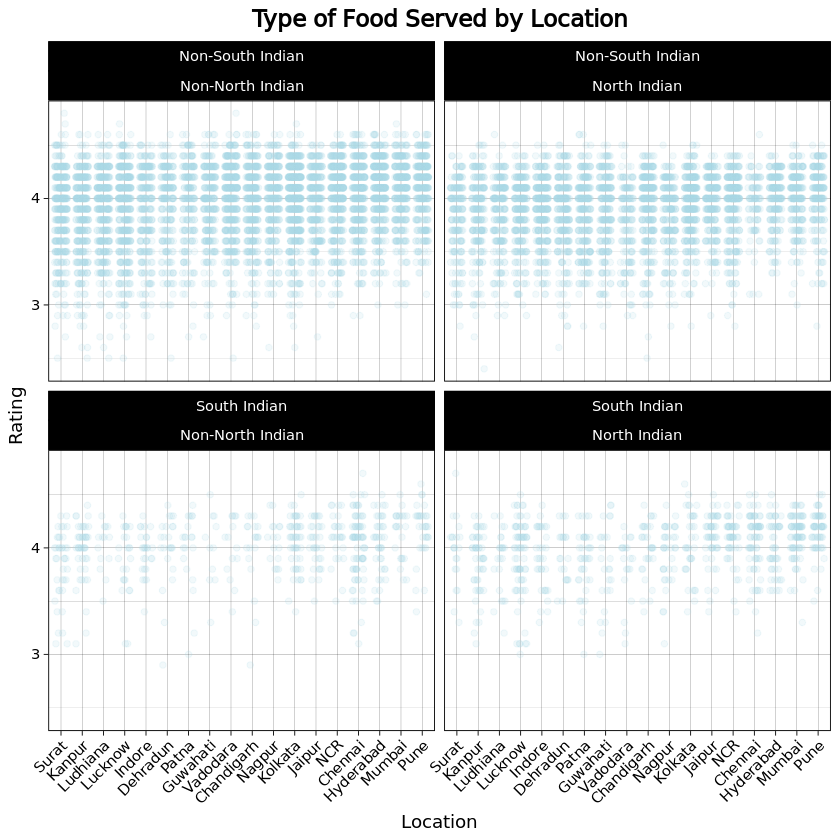

In [19]:
#Creating a variable that holds the mean city rankings
fooddata <- fooddata |>
  group_by(location) |>
  mutate(average_city_ranking = mean(rating, na.rm = TRUE)) |>
  filter(n() > 500)

#Ordering the cities by their average ranking
ordered_locations <- with(fooddata, reorder(location, average_city_ranking))

# Create the plot and make her look pretty
ggplot(fooddata, aes(x = ordered_locations, y = rating)) +
  geom_point(alpha = 0.15, na.rm = TRUE, position = position_jitter(width = 0.3, height = 0), color = "lightblue") +
  labs(x = 'Location', y = 'Rating', title = 'Type of Food Served by Location', 
       title.theme = element_text(color = "darkblue")) +  # Set title color to dark blue
  facet_wrap(~south_indian_or_not + north_indian_or_not, nrow = 2,
             labeller = labeller(south_indian_or_not = c("0" = "Non-South Indian", "1" = "South Indian"),
                                 north_indian_or_not = c("0" = "Non-North Indian", "1" = "North Indian"))) +
  theme_linedraw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
        legend.position = "right")



The next chart attempts to determine if factors outside the quality of the food and the price determine the rankings of the food. Ultimately, it does not look like from this visualization that the delivery time or the type of food substantially affects the ranking of the food. It does marginally affect the spread of the data though, with a slightly higher spread of rankings for bakeries and street food than Biryani. There is also one bakery with an 80 plus minute wait time and one of the best rankings, which I'd love to go to. 

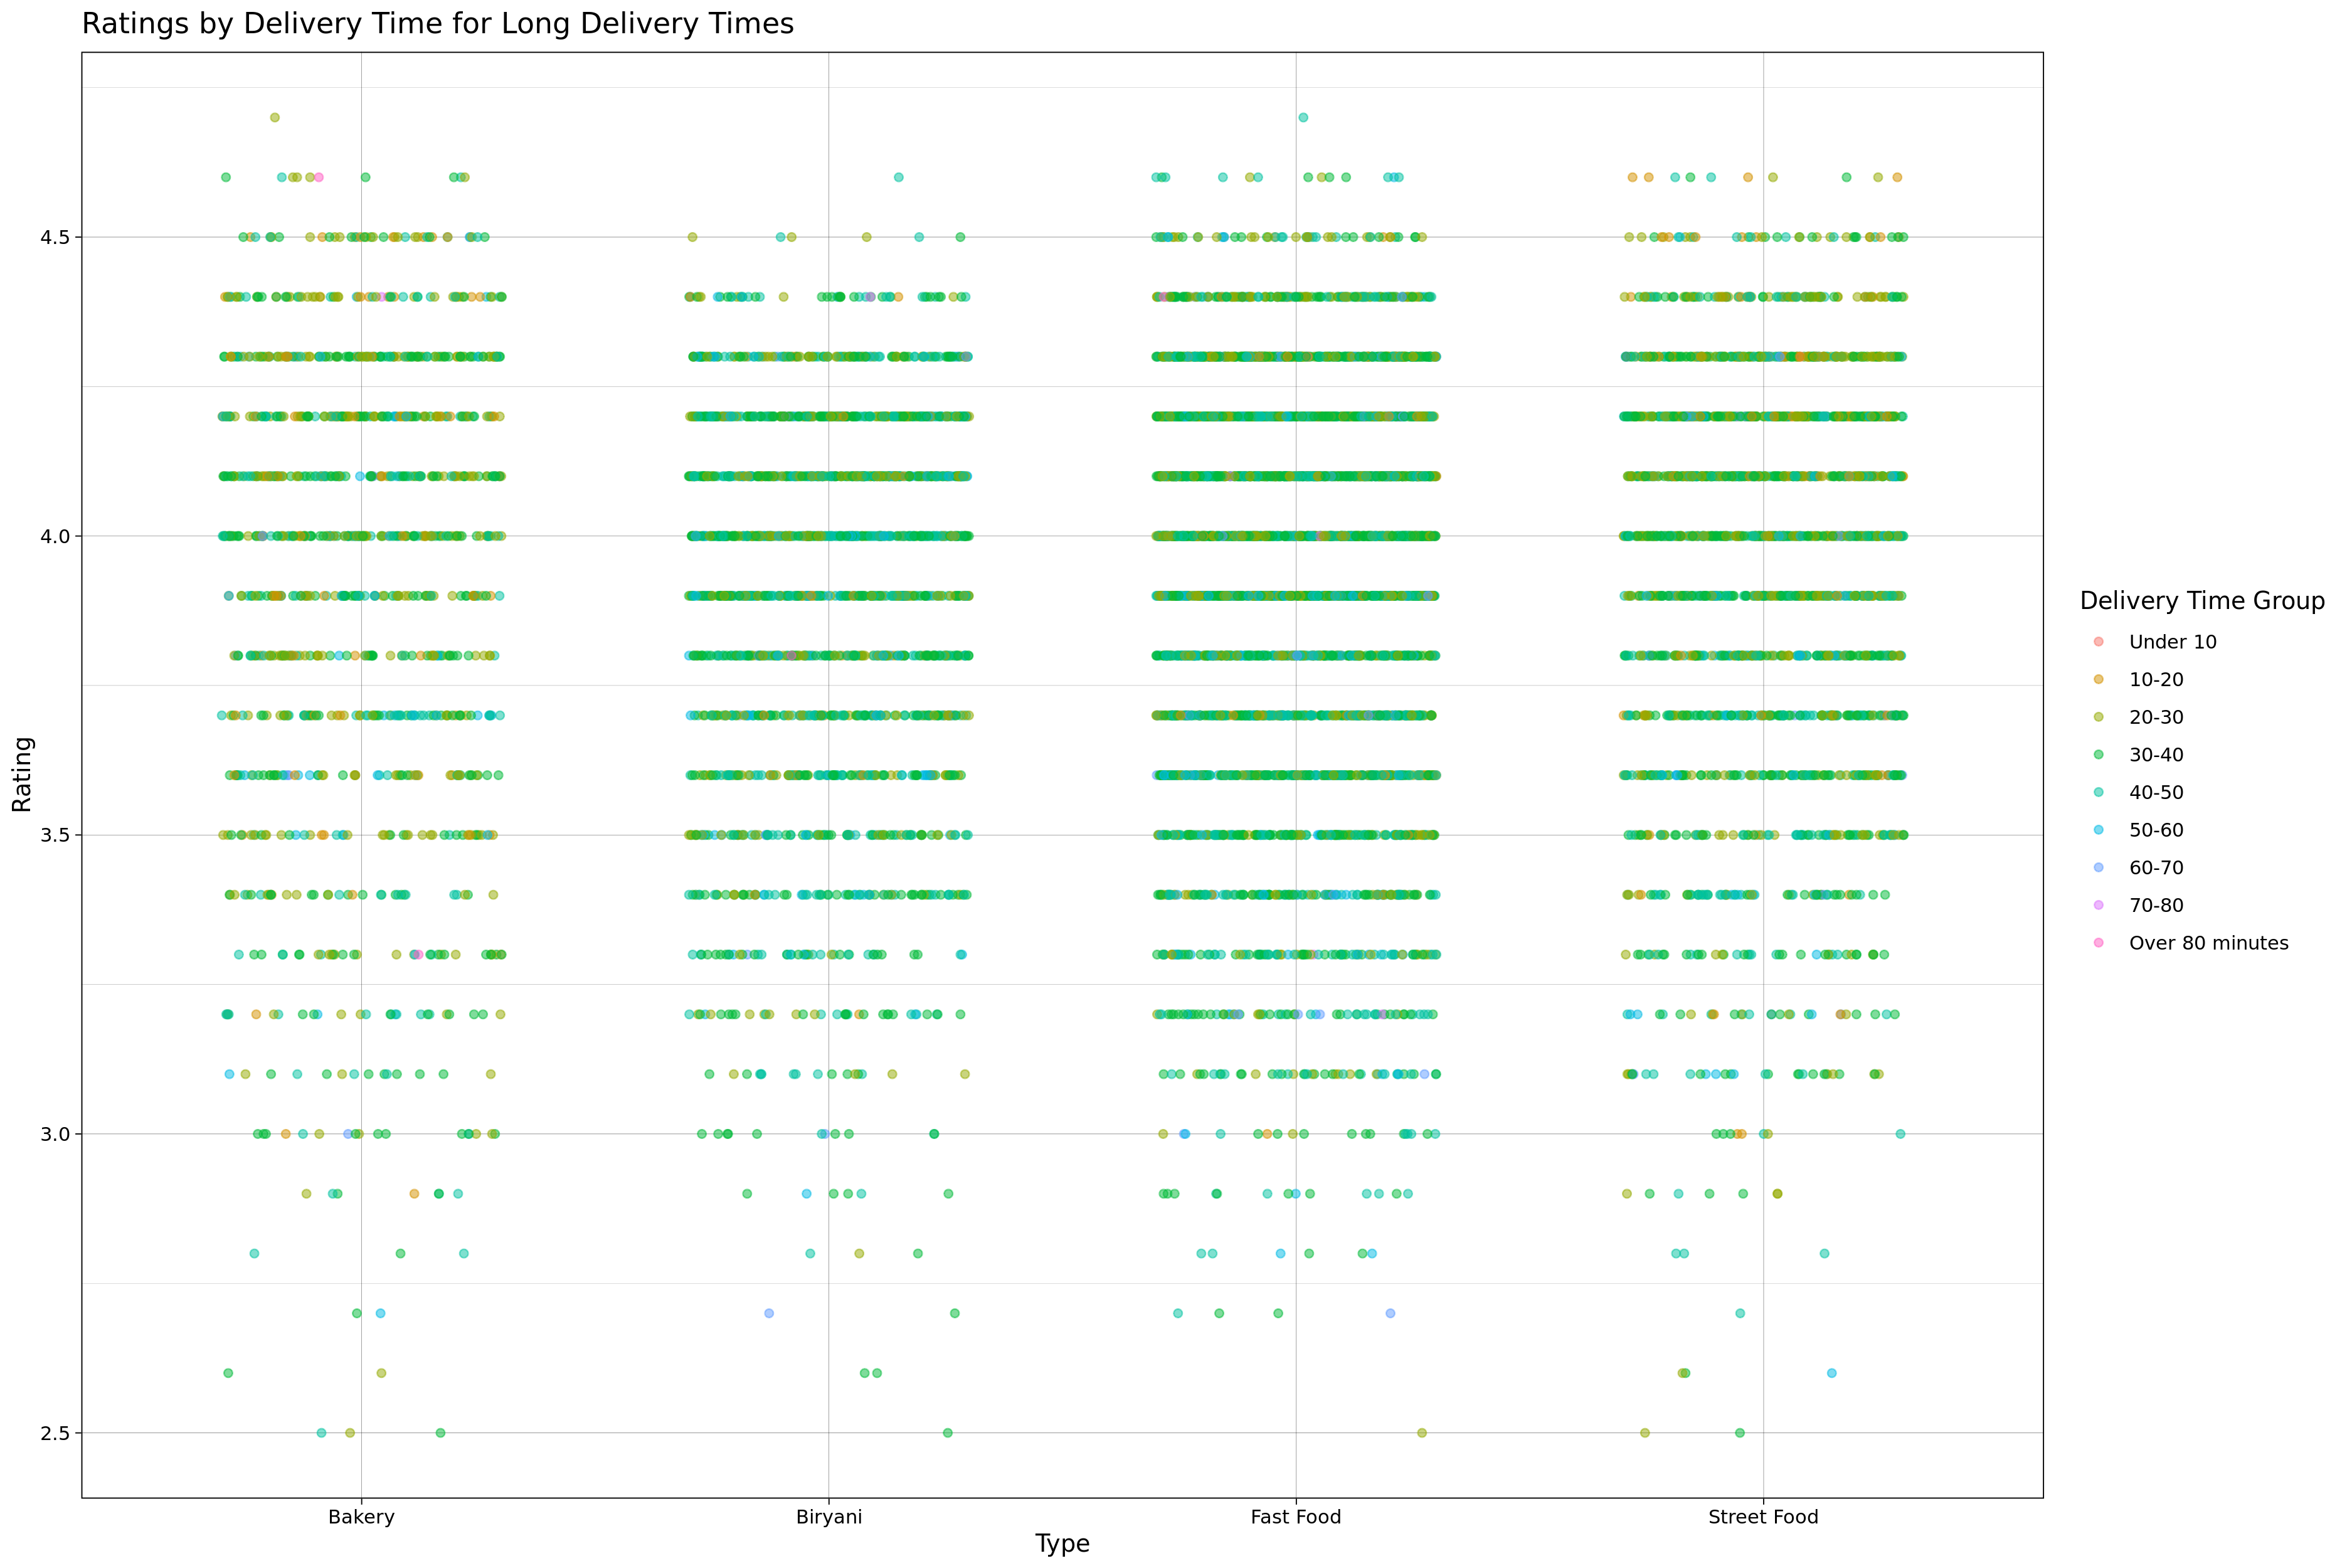

In [33]:
options(repr.plot.res = 250, repr.plot.height = 10, repr.plot.width = 15)
#Rotate data to get types
fooddata_long <- fooddata %>%
  pivot_longer(cols = c(fast_food_or_not, street_food, biryani_or_not, bakery_or_not), names_to = 'type')

# Filter only rows where the value is 1 (presence)
fooddata_present <- fooddata_long %>%
  filter(value == 1)

fooddata_present <- fooddata_present %>%
  mutate(delivery_time_group = cut(average._delivery_time,
                                   breaks = c(-Inf, 10, 20, 30, 40, 50, 60, 70, 80, Inf),
                                   labels = c("Under 10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "Over 80 minutes"),
                                   include.lowest = TRUE))

# Create the point graph
ggplot(fooddata_present, aes(x = type, y = rating, color = as.factor(delivery_time_group))) +
  geom_point(alpha = 0.5, na.rm = T, position = position_jitter(width = 0.3, height = 0)) +
  labs(x = 'Type', y = 'Rating', color = 'Delivery Time Group', title = 'Ratings by Delivery Time for Long Delivery Times') +
  scale_x_discrete(labels = c(bakery_or_not = 'Bakery', biryani_or_not = 'Biryani', street_food = 'Street Food', fast_food_or_not = 'Fast Food')) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + theme_linedraw()

Finally, I looked at the distribution of the ranking of restaurant types using an ECDF chart. Notably, I also included a none section in this data, as many data points did not fit into one of the binary categories. Interestingly, it's fast food that stands out here. 

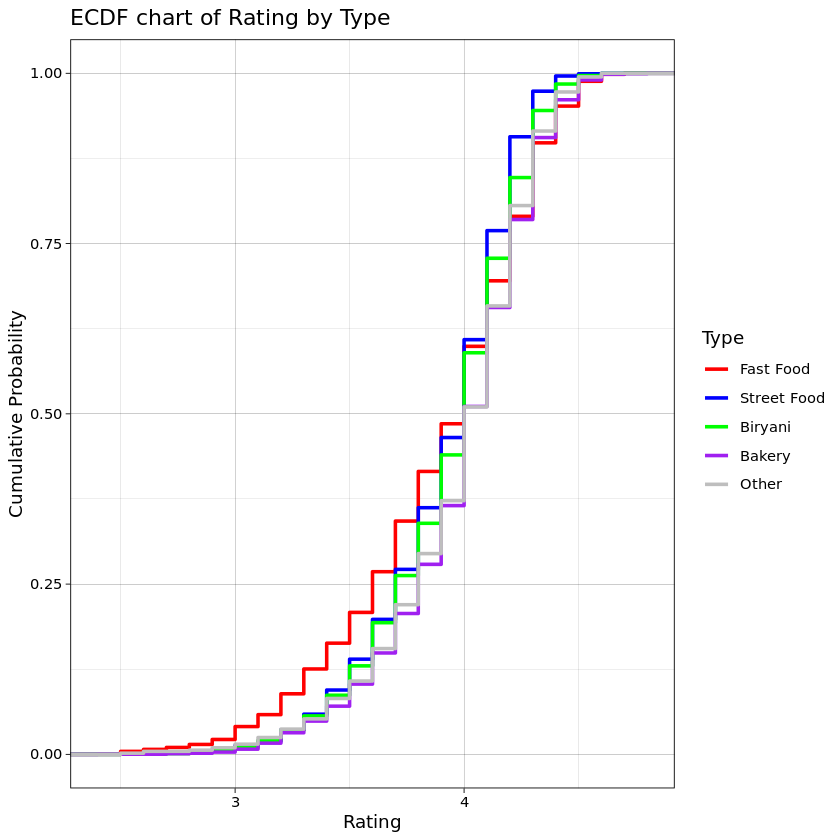

In [21]:
#Create a single variabe out of the 5 above- another method of acquiring type data
fooddata <- fooddata %>%
  mutate(typecre = case_when(
    fast_food_or_not == 1 ~ 'Fast Food',
    street_food == 1 ~ 'Street Food',
    biryani_or_not == 1 ~ 'Biryani',
    bakery_or_not == 1 ~ 'Bakery',
    TRUE ~ 'Other'  # Assign 'Other' for NA values
  ))

# Create the ECDF chart, including a line for restaurants that don't fit into a category. 
ggplot(fooddata, aes(x = rating, color = typecre)) +
  stat_ecdf(geom = "step", linewidth = 1) +
  labs(x = 'Rating', y = 'Cumulative Probability', title = "ECDF chart of Rating by Type", color = "Type") +
  scale_color_manual(values = c('red', 'blue', 'green', 'purple', 'gray'),  
                     labels = c('Fast Food', 'Street Food', 'Biryani', 'Bakery', 'Other')) +
  theme_linedraw()